In [310]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import time

import pandas as pd
from sklearn import tree, neural_network, preprocessing, ensemble, svm, neighbors
import graphviz
from sklearn.model_selection import train_test_split,KFold, ShuffleSplit,RepeatedStratifiedKFold
from sklearn.metrics import *
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import cross_val_score
import time
import warnings

warnings.filterwarnings("ignore")

In [2]:
#this problem tries to maximize the total number of 1s in the string. Length of string is 10
def domain1(state):
    fitness = sum(state)
    return fitness

#this problem tries to find this string: [0,1,0,0,1,1,1,0,0,1]
def domain2(state):
    target = np.array([0,1,0,0,1,1,1,0,0,1])
    fitness = 0
    for i in range(len(target)):
        if state[i] == target[i]:
            fitness +=1
            
    return fitness

#this problem tries to maximize alternations
def domain3(state):
    fitness = 1
    for i in range(len(state)-1):
        if state[i] != state[i+1]:
            fitness +=1
            
    return fitness

def domain4(state):
    
    length = len(state)
    fitness = 0
    for i in range(length):
        if state[i] == state[length-1-i]:
            fitness +=1
        
    return fitness

In [3]:
custom_fitness1 = mlrose.CustomFitness(domain1)
custom_fitness2 = mlrose.CustomFitness(domain2)
custom_fitness3 = mlrose.CustomFitness(domain3)
custom_fitness4 = mlrose.CustomFitness(domain4)

In [150]:
test_fitness1 = mlrose.FourPeaks(t_pct=0.2)

In [151]:
edges = [(0, 1), (0, 2), (1, 4), (2, 3), (3, 4)]
test_fitness2 = mlrose.MaxKColor(edges)

In [306]:
problem1 = mlrose.DiscreteOpt(length = 10, fitness_fn = custom_fitness2, maximize = True, max_val = 2)
#problem1 = mlrose.DiscreteOpt(length = 5, fitness_fn = test_fitness2, maximize = True, max_val = 5)
problem2 = mlrose.DiscreteOpt(length = 50, fitness_fn = test_fitness1, maximize = True, max_val = 2)
problem3 = mlrose.DiscreteOpt(length = 50, fitness_fn = custom_fitness3, maximize = True, max_val = 2)

In [153]:
rhc_prob1 = mlrose.random_hill_climb(problem1,curve = True)
rhc_prob2 = mlrose.random_hill_climb(problem2,curve = True)
rhc_prob3 = mlrose.random_hill_climb(problem3,curve = True)

In [154]:
schedule = mlrose.ExpDecay(init_temp=1.0, exp_const=0.05, min_temp=0.001)
sa_prob1 = mlrose.simulated_annealing(problem1,max_attempts=10,schedule = schedule,curve = True)
sa_prob2 = mlrose.simulated_annealing(problem2,max_attempts=10,schedule = schedule,curve = True)
sa_prob3 = mlrose.simulated_annealing(problem3,max_attempts=10,schedule = schedule,curve = True)

In [155]:
ga_prob1 = mlrose.genetic_alg(problem1,pop_size=10, curve = True)
ga_prob2 = mlrose.genetic_alg(problem2,pop_size=10, curve = True)
ga_prob3 = mlrose.genetic_alg(problem3,pop_size=10, curve = True)

In [156]:
mimic_prob1 = mlrose.mimic(problem1,pop_size=30, max_attempts=20, curve = True)
mimic_prob2 = mlrose.mimic(problem2,pop_size=30, max_attempts=20, curve = True)
mimic_prob3 = mlrose.mimic(problem3,pop_size=30, max_attempts=20, curve = True)

In [230]:
fitness_list = []
num_trail = []
for i in range(10):
    rhc_prob1_temp = mlrose.random_hill_climb(problem3,restarts = i*4,max_attempts = 5, curve = True)
    fitness_list.append(rhc_prob1_temp[1])
    num_trail.append(len(rhc_prob1_temp[2]))

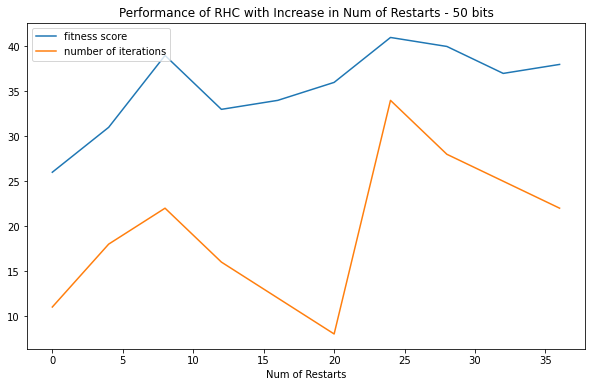

In [231]:
plt.figure(figsize=(10, 6)) 
plt.plot(np.arange(10)*4 ,fitness_list, label = "fitness score")
plt.plot(np.arange(10)*4 ,num_trail, label = "number of iterations")
plt.legend(loc="upper left")    
plt.title('Performance of RHC with Increase in Num of Restarts - 50 bits')
plt.xlabel('Num of Restarts')
#plt.ylabel('error rate')
plt.show()

In [167]:
fitness_list = []
num_trail = []
for i in range(10):
    rhc_prob1_temp = mlrose.random_hill_climb(problem2,restarts = 3,max_attempts = i, curve = True)
    fitness_list.append(rhc_prob1_temp[1])
    num_trail.append(len(rhc_prob1_temp[2]))

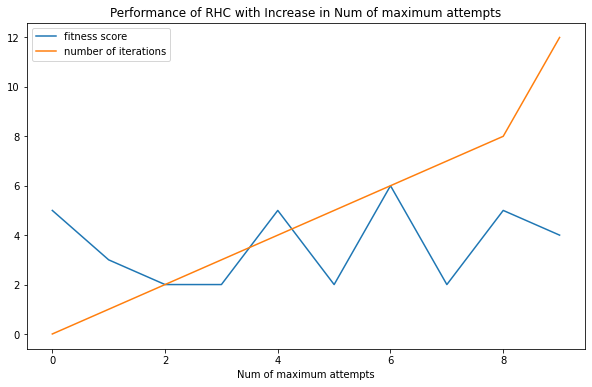

In [168]:
plt.figure(figsize=(10, 6)) 
plt.plot(np.arange(10) ,fitness_list, label = "fitness score")
plt.plot(np.arange(10) ,num_trail, label = "number of iterations")
plt.legend(loc="upper left")    
plt.title('Performance of RHC with Increase in Num of maximum attempts')
plt.xlabel('Num of maximum attempts')
#plt.ylabel('error rate')
plt.show()

In [275]:
fitness_list = []
num_trail = []
schedule = mlrose.ExpDecay(init_temp=1.0, exp_const=0.1, min_temp=0.001)
for i in range(50):
    sa_prob1_temp = mlrose.simulated_annealing(problem3,max_attempts=i+1,schedule = schedule,curve = True)
    fitness_list.append(sa_prob1_temp[1])
    num_trail.append(len(sa_prob1_temp[2]))

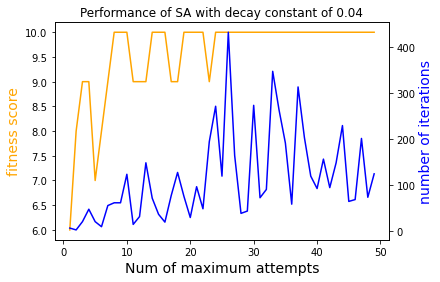

In [276]:
fig,ax = plt.subplots()
plt.title('Performance of SA with decay constant of 0.04')
# make a plot
ax.plot((np.arange(49)+1),
        fitness_list[:-1],color="orange")
# set x-axis label
ax.set_xlabel("Num of maximum attempts", fontsize = 14)
# set y-axis label
ax.set_ylabel("fitness score",
              color="orange",
              fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot((np.arange(49)+1), num_trail[:-1],color="blue")
ax2.set_ylabel("number of iterations",color="blue",fontsize=14)
plt.show()

In [237]:
fitness_list = []
num_trail = []
for i in range(10):
    schedule = mlrose.ExpDecay(init_temp=1.0, exp_const=0.01*(i+1), min_temp=0.001)
    sa_prob1_temp = sa_prob1 = mlrose.simulated_annealing(problem3,max_attempts=10,schedule = schedule,curve = True)
    fitness_list.append(sa_prob1_temp[1])
    num_trail.append(len(sa_prob1_temp[2]))

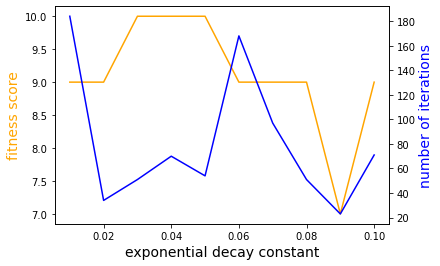

In [238]:
fig,ax = plt.subplots()
# make a plot
ax.plot((np.arange(10)+1)*0.01,
        fitness_list,color="orange")
# set x-axis label
ax.set_xlabel("exponential decay constant", fontsize = 14)
# set y-axis label
ax.set_ylabel("fitness score",
              color="orange",
              fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot((np.arange(10)+1)*0.01, num_trail,color="blue")
ax2.set_ylabel("number of iterations",color="blue",fontsize=14)
plt.show()


In [279]:
fitness_list = []
num_trail = []
for i in range(30):
    ga_prob1_temp = mlrose.genetic_alg(problem3,pop_size=(i+1)*2, curve = True)
    fitness_list.append(ga_prob1_temp[1])
    num_trail.append(len(ga_prob1_temp[2]))

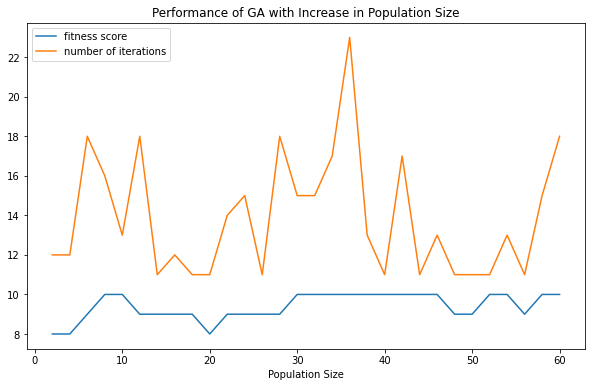

In [280]:
plt.figure(figsize=(10, 6)) 
plt.plot((np.arange(30)+1)*2 ,fitness_list, label = "fitness score")
plt.plot((np.arange(30)+1)*2 ,num_trail, label = "number of iterations")
plt.legend(loc="upper left")    
plt.title('Performance of GA with Increase in Population Size')
plt.xlabel('Population Size')
#plt.ylabel('error rate')
plt.show()

In [207]:
fitness_list = []
num_trail = []
for i in range(10):
    ga_prob1_temp = mlrose.genetic_alg(problem3,pop_size=20,mutation_prob=(i+1)/100, curve = True)
    fitness_list.append(ga_prob1_temp[1])
    num_trail.append(len(ga_prob1_temp[2]))

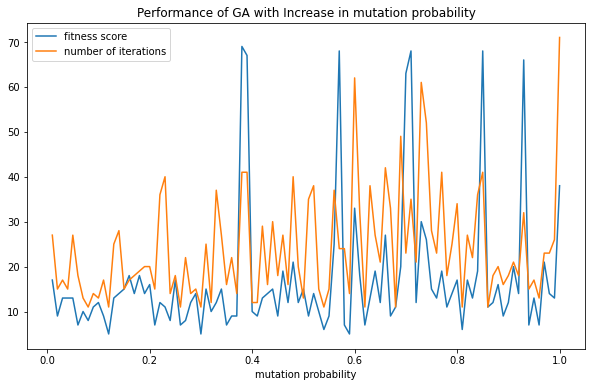

In [208]:
plt.figure(figsize=(10, 6)) 
plt.plot((np.arange(10)+1)/100 ,fitness_list, label = "fitness score")
plt.plot((np.arange(10)+1)/100 ,num_trail, label = "number of iterations")
plt.legend(loc="upper left")    
plt.title('Performance of GA with Increase in mutation probability')
plt.xlabel('mutation probability')
#plt.ylabel('error rate')
plt.show()

In [307]:
fitness_list = []
num_trail = []
time_spent= []
for i in range(10):
    start = time.time()
    mimic_prob1_temp = mlrose.mimic(problem3,pop_size=(i+4)*10, max_attempts=10, curve = True)
    time_spent_temp = time.time() - start
    fitness_list.append(mimic_prob1_temp[1])
    num_trail.append(len(mimic_prob1_temp[2]))
    time_spent.append(time_spent_temp*100/len(mimic_prob1_temp[2]))

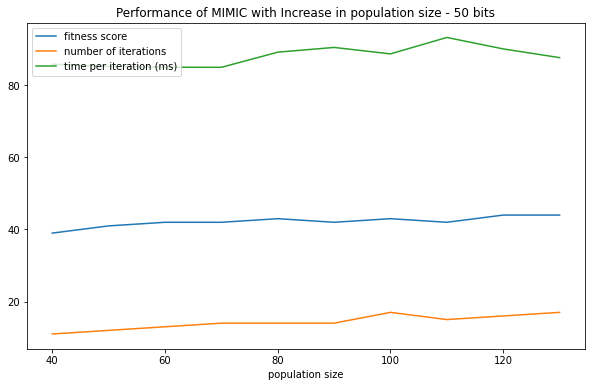

In [309]:
plt.figure(figsize=(10, 6)) 
plt.plot((np.arange(10)+4)*10 ,fitness_list, label = "fitness score")
plt.plot((np.arange(10)+4)*10 ,num_trail, label = "number of iterations")
plt.plot((np.arange(10)+4)*10 ,time_spent, label = "time per iteration (ms)")
plt.legend(loc="upper left")    
plt.title('Performance of MIMIC with Increase in population size - 50 bits')
plt.xlabel('population size')
#plt.ylabel('error rate')
plt.show()

## NN Problem

In [346]:
df = pd.read_csv('motion_data.csv')
standard_scaler = preprocessing.StandardScaler()
numeric_scaled_df = standard_scaler.fit_transform(df[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ']])
X = pd.DataFrame(numeric_scaled_df, columns=['AccX','AccY','AccZ','GyroX','GyroY','GyroZ'])
y = df['Class'].map({'AGGRESSIVE': 1, 'NORMAL': 0, 'SLOW':0})

X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [349]:
max_iteration = list(np.arange(1000,21000,1000))

test_accuracy_list = []
test_auc_list = []
train_accuracy_list = []
train_auc_list = []
iteration_list = []
k=5
group = KFold(n_splits=k, random_state=1,shuffle=True)
training_time_series = []
for i in range(1000,21000,1000):
    clf = mlrose.NeuralNetwork(hidden_nodes = [10], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = i, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3, curve=True)

    test_agg_accu = 0
    test_agg_auc = 0
    train_agg_accu = 0
    train_agg_auc = 0
    training_time_sum = 0
    iteration_sum = 0
    for train_index, test_index in group.split(X_Train):
        X_train, X_test = X_Train.iloc[train_index], X_Train.iloc[test_index]
        Y_train, Y_test = y_Train.iloc[train_index], y_Train.iloc[test_index]
        start = time.time()
        clf = clf.fit( X_train,Y_train)
        stop = time.time()
        training_time = stop - start
        training_time_sum += training_time
        iteration_sum += len(clf.fitness_curve)
        Y_pred = clf.predict(X_test)
        Y_pred_train = clf.predict(X_train)
        test_accuracy = accuracy_score(Y_test , Y_pred)
        test_auc = roc_auc_score(Y_test , Y_pred)
        train_accuracy = accuracy_score(Y_train , Y_pred_train)
        train_auc = roc_auc_score(Y_train , Y_pred_train)
        test_agg_accu = test_agg_accu+ test_accuracy
        test_agg_auc = test_agg_auc + test_auc
        train_agg_accu = train_agg_accu + train_accuracy
        train_agg_auc = train_agg_auc + train_auc
    test_avg_accu = test_agg_accu/k
    test_avg_auc = test_agg_auc/k
    train_avg_accu = train_agg_accu/k
    train_avg_auc = train_agg_auc/k
    training_time_series.append(training_time_sum/k)
    iteration_list.append(iteration_sum/k)

    test_accuracy_list.append(test_avg_accu)
    test_auc_list.append(test_avg_auc)

    train_accuracy_list.append(train_avg_accu)
    train_auc_list.append(train_avg_auc)

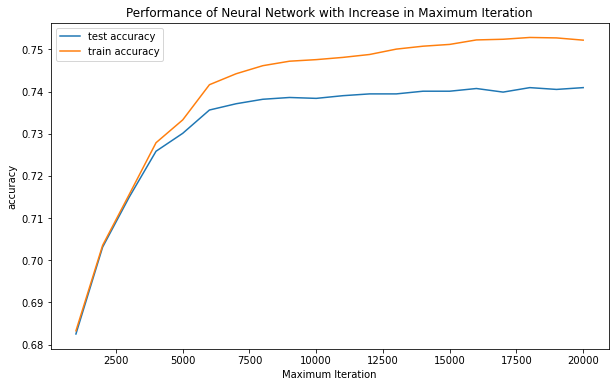

In [350]:
plt.figure(figsize=(10, 6)) 
plt.plot(max_iteration ,test_accuracy_list, label = "test accuracy")
plt.plot(max_iteration ,train_accuracy_list, label = "train accuracy")
plt.legend(loc="upper left")    
plt.title('Performance of Neural Network with Increase in Maximum Iteration')
plt.xlabel('Maximum Iteration')
plt.ylabel('accuracy')
plt.show()

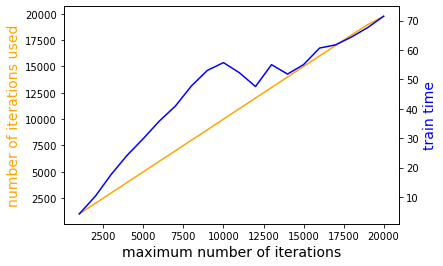

In [356]:
fig,ax = plt.subplots()
# make a plot
ax.plot(max_iteration,
        iteration_list,color="orange")
# set x-axis label
ax.set_xlabel("maximum number of iterations", fontsize = 14)
# set y-axis label
ax.set_ylabel("number of iterations used",
              color="orange",
              fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(max_iteration ,training_time_series,color="blue")
ax2.set_ylabel("train time",color="blue",fontsize=14)
plt.show()

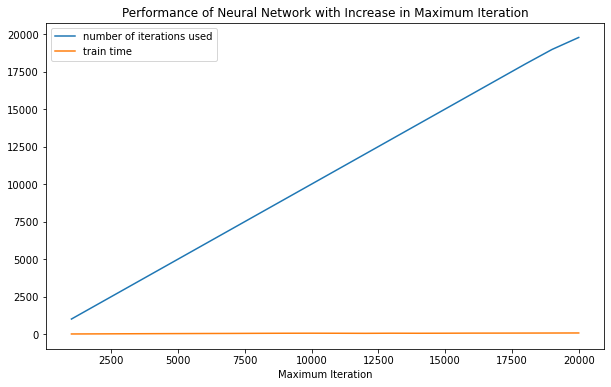

In [351]:
plt.figure(figsize=(10, 6)) 
plt.plot(max_iteration ,iteration_list, label = "number of iterations used")
plt.plot(max_iteration ,training_time_series, label = "train time")
plt.legend(loc="upper left")    
plt.title('Performance of Neural Network with Increase in Maximum Iteration')
plt.xlabel('Maximum Iteration')
#plt.ylabel('accuracy')
plt.show()

In [342]:
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 20000, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3, curve=True)

nn_model1.fit(X_Train, y_Train)

NeuralNetwork(activation='relu', algorithm='random_hill_climb', bias=True,
              clip_max=5, curve=True, early_stopping=True, hidden_nodes=[10],
              is_classifier=True, learning_rate=0.01, max_attempts=100,
              max_iters=20000, mutation_prob=0.1, pop_size=200, random_state=3,
              restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.99, min_temp=0.001))

In [357]:
max_iteration = list(np.arange(1000,21000,2000))

test_accuracy_list = []
test_auc_list = []
train_accuracy_list = []
train_auc_list = []
iteration_list = []
k=5
group = KFold(n_splits=k, random_state=1,shuffle=True)
training_time_series = []
for i in range(1000,21000,2000):
    clf = mlrose.NeuralNetwork(hidden_nodes = [10], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = i, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3, curve=True)

    test_agg_accu = 0
    test_agg_auc = 0
    train_agg_accu = 0
    train_agg_auc = 0
    training_time_sum = 0
    iteration_sum = 0
    for train_index, test_index in group.split(X_Train):
        X_train, X_test = X_Train.iloc[train_index], X_Train.iloc[test_index]
        Y_train, Y_test = y_Train.iloc[train_index], y_Train.iloc[test_index]
        start = time.time()
        clf = clf.fit( X_train,Y_train)
        stop = time.time()
        training_time = stop - start
        training_time_sum += training_time
        iteration_sum += len(clf.fitness_curve)
        Y_pred = clf.predict(X_test)
        Y_pred_train = clf.predict(X_train)
        test_accuracy = accuracy_score(Y_test , Y_pred)
        test_auc = roc_auc_score(Y_test , Y_pred)
        train_accuracy = accuracy_score(Y_train , Y_pred_train)
        train_auc = roc_auc_score(Y_train , Y_pred_train)
        test_agg_accu = test_agg_accu+ test_accuracy
        test_agg_auc = test_agg_auc + test_auc
        train_agg_accu = train_agg_accu + train_accuracy
        train_agg_auc = train_agg_auc + train_auc
    test_avg_accu = test_agg_accu/k
    test_avg_auc = test_agg_auc/k
    train_avg_accu = train_agg_accu/k
    train_avg_auc = train_agg_auc/k
    training_time_series.append(training_time_sum/k)
    iteration_list.append(iteration_sum/k)

    test_accuracy_list.append(test_avg_accu)
    test_auc_list.append(test_avg_auc)

    train_accuracy_list.append(train_avg_accu)
    train_auc_list.append(train_avg_auc)

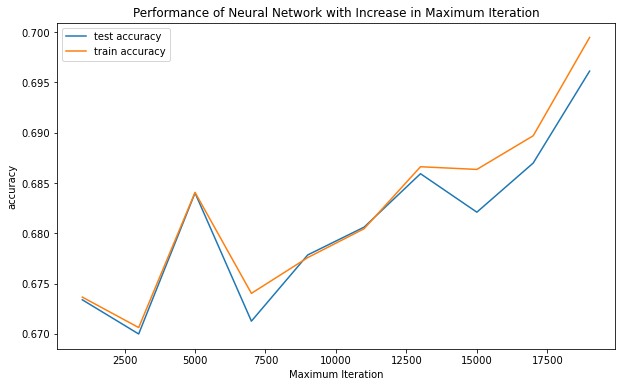

In [358]:
plt.figure(figsize=(10, 6)) 
plt.plot(max_iteration ,test_accuracy_list, label = "test accuracy")
plt.plot(max_iteration ,train_accuracy_list, label = "train accuracy")
plt.legend(loc="upper left")    
plt.title('Performance of Neural Network with Increase in Maximum Iteration')
plt.xlabel('Maximum Iteration')
plt.ylabel('accuracy')
plt.show()

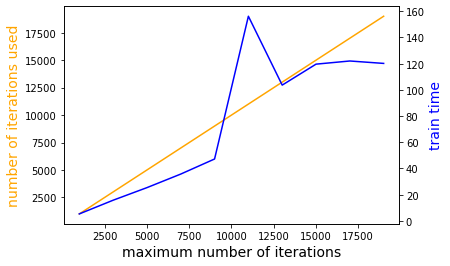

In [359]:
fig,ax = plt.subplots()
# make a plot
ax.plot(max_iteration,
        iteration_list,color="orange")
# set x-axis label
ax.set_xlabel("maximum number of iterations", fontsize = 14)
# set y-axis label
ax.set_ylabel("number of iterations used",
              color="orange",
              fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(max_iteration ,training_time_series,color="blue")
ax2.set_ylabel("train time",color="blue",fontsize=14)
plt.show()

In [366]:
max_iteration = list(np.arange(0.96,0.999,0.008))

test_accuracy_list = []
test_auc_list = []
train_accuracy_list = []
train_auc_list = []
iteration_list = []
k=5
group = KFold(n_splits=k, random_state=1,shuffle=True)
training_time_series = []
for i in max_iteration:
    clf = mlrose.NeuralNetwork(hidden_nodes = [10], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 10000, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3, curve=True,
                                 schedule=mlrose.GeomDecay(init_temp=1.0, decay=i, min_temp=0.001))

    test_agg_accu = 0
    test_agg_auc = 0
    train_agg_accu = 0
    train_agg_auc = 0
    training_time_sum = 0
    iteration_sum = 0
    for train_index, test_index in group.split(X_Train):
        X_train, X_test = X_Train.iloc[train_index], X_Train.iloc[test_index]
        Y_train, Y_test = y_Train.iloc[train_index], y_Train.iloc[test_index]
        start = time.time()
        clf = clf.fit( X_train,Y_train)
        stop = time.time()
        training_time = stop - start
        training_time_sum += training_time
        iteration_sum += len(clf.fitness_curve)
        Y_pred = clf.predict(X_test)
        Y_pred_train = clf.predict(X_train)
        test_accuracy = accuracy_score(Y_test , Y_pred)
        test_auc = roc_auc_score(Y_test , Y_pred)
        train_accuracy = accuracy_score(Y_train , Y_pred_train)
        train_auc = roc_auc_score(Y_train , Y_pred_train)
        test_agg_accu = test_agg_accu+ test_accuracy
        test_agg_auc = test_agg_auc + test_auc
        train_agg_accu = train_agg_accu + train_accuracy
        train_agg_auc = train_agg_auc + train_auc
    test_avg_accu = test_agg_accu/k
    test_avg_auc = test_agg_auc/k
    train_avg_accu = train_agg_accu/k
    train_avg_auc = train_agg_auc/k
    training_time_series.append(training_time_sum/k)
    iteration_list.append(iteration_sum/k)

    test_accuracy_list.append(test_avg_accu)
    test_auc_list.append(test_avg_auc)

    train_accuracy_list.append(train_avg_accu)
    train_auc_list.append(train_avg_auc)

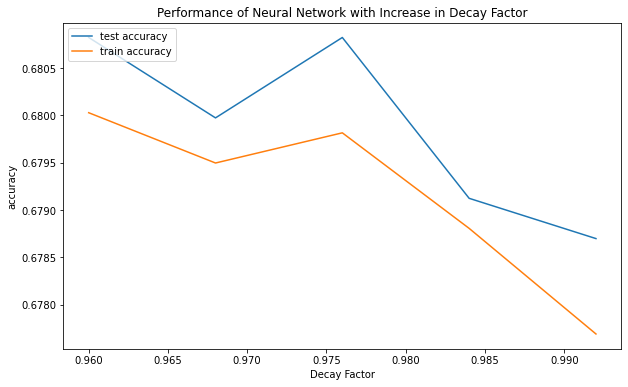

In [367]:
plt.figure(figsize=(10, 6)) 
plt.plot(max_iteration ,test_accuracy_list, label = "test accuracy")
plt.plot(max_iteration ,train_accuracy_list, label = "train accuracy")
plt.legend(loc="upper left")    
plt.title('Performance of Neural Network with Increase in Decay Factor')
plt.xlabel('Decay Factor')
plt.ylabel('accuracy')
plt.show()

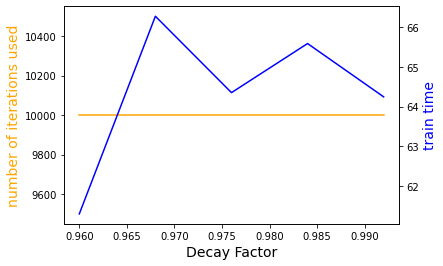

In [368]:
fig,ax = plt.subplots()
# make a plot
ax.plot(max_iteration,
        iteration_list,color="orange")
# set x-axis label
ax.set_xlabel("Decay Factor", fontsize = 14)
# set y-axis label
ax.set_ylabel("number of iterations used",
              color="orange",
              fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(max_iteration ,training_time_series,color="blue")
ax2.set_ylabel("train time",color="blue",fontsize=14)
plt.show()

In [369]:
max_iteration = list(np.arange(1000,21000,2000))

test_accuracy_list = []
test_auc_list = []
train_accuracy_list = []
train_auc_list = []
iteration_list = []
k=5
group = KFold(n_splits=k, random_state=1,shuffle=True)
training_time_series = []
for i in range(1000,21000,2000):
    clf = mlrose.NeuralNetwork(hidden_nodes = [10], activation ='relu', 
                                 algorithm ='genetic_alg', 
                                 max_iters = i, bias = True, is_classifier = True, 
                                 learning_rate = 0.01, early_stopping = True, 
                                 clip_max = 5, max_attempts = 100, random_state = 3, curve=True)

    test_agg_accu = 0
    test_agg_auc = 0
    train_agg_accu = 0
    train_agg_auc = 0
    training_time_sum = 0
    iteration_sum = 0
    for train_index, test_index in group.split(X_Train):
        X_train, X_test = X_Train.iloc[train_index], X_Train.iloc[test_index]
        Y_train, Y_test = y_Train.iloc[train_index], y_Train.iloc[test_index]
        start = time.time()
        clf = clf.fit( X_train,Y_train)
        stop = time.time()
        training_time = stop - start
        training_time_sum += training_time
        iteration_sum += len(clf.fitness_curve)
        Y_pred = clf.predict(X_test)
        Y_pred_train = clf.predict(X_train)
        test_accuracy = accuracy_score(Y_test , Y_pred)
        test_auc = roc_auc_score(Y_test , Y_pred)
        train_accuracy = accuracy_score(Y_train , Y_pred_train)
        train_auc = roc_auc_score(Y_train , Y_pred_train)
        test_agg_accu = test_agg_accu+ test_accuracy
        test_agg_auc = test_agg_auc + test_auc
        train_agg_accu = train_agg_accu + train_accuracy
        train_agg_auc = train_agg_auc + train_auc
    test_avg_accu = test_agg_accu/k
    test_avg_auc = test_agg_auc/k
    train_avg_accu = train_agg_accu/k
    train_avg_auc = train_agg_auc/k
    training_time_series.append(training_time_sum/k)
    iteration_list.append(iteration_sum/k)

    test_accuracy_list.append(test_avg_accu)
    test_auc_list.append(test_avg_auc)

    train_accuracy_list.append(train_avg_accu)
    train_auc_list.append(train_avg_auc)

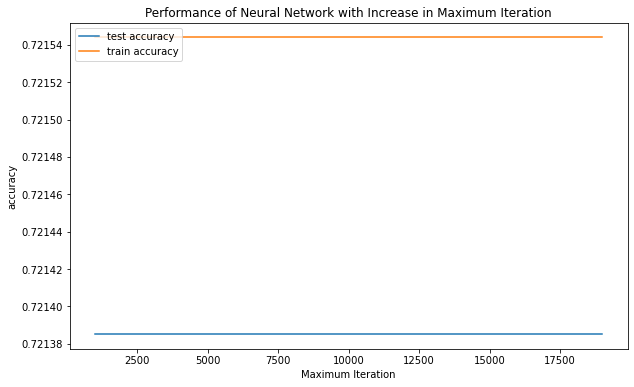

In [370]:
plt.figure(figsize=(10, 6)) 
plt.plot(max_iteration ,test_accuracy_list, label = "test accuracy")
plt.plot(max_iteration ,train_accuracy_list, label = "train accuracy")
plt.legend(loc="upper left")    
plt.title('Performance of Neural Network with Increase in Maximum Iteration')
plt.xlabel('Maximum Iteration')
plt.ylabel('accuracy')
plt.show()

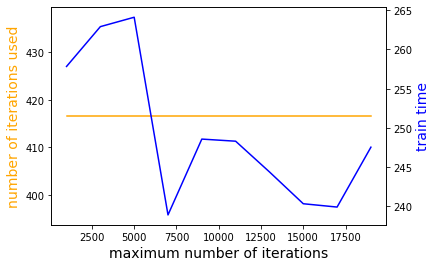

In [371]:
fig,ax = plt.subplots()
# make a plot
ax.plot(max_iteration,
        iteration_list,color="orange")
# set x-axis label
ax.set_xlabel("maximum number of iterations", fontsize = 14)
# set y-axis label
ax.set_ylabel("number of iterations used",
              color="orange",
              fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(max_iteration ,training_time_series,color="blue")
ax2.set_ylabel("train time",color="blue",fontsize=14)
plt.show()

In [372]:
 iteration_list

[416.6, 416.6, 416.6, 416.6, 416.6, 416.6, 416.6, 416.6, 416.6, 416.6]

In [345]:
# Predict labels for train set and assess accuracy
y_test_pred = nn_model1.predict(X_Test)

y_test_accuracy = accuracy_score(y_Test, y_test_pred)

print(y_test_accuracy)

0.7315502724120851


In [316]:
cm=confusion_matrix(y_Train, y_train_pred)
cm

array([[3047,  325],
       [1184,  153]], dtype=int64)